In [1]:
!pip3 install opencv-python

In [2]:
import keras
#from tensorflow.keras import Sequential
from keras.models import Sequential
#from keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout
#from keras.utils import to_categorical

import tensorflow as tf
#from tensorflow.keras import Sequential
from keras.callbacks import Callback
# import h5py
import numpy as np
from keras import datasets, layers, models
import matplotlib.pyplot as plt
from matplotlib.image import imread
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

import pandas as pd

from matplotlib import pyplot as plt
import cv2

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd drive/MyDrive/Bengaluru

/content/drive/MyDrive/Bengaluru


In [6]:
# Step 1: Read CSV file
csv_file_path = 'good.csv'
csv_data = pd.read_csv(csv_file_path)

# Step 2: Process Images and Create Separate Arrays for Input and Output
image_folder_path = 'a_Good/'

# Initialize empty lists to store image arrays and additional data
good_input = []
good_output = []

for index, row in csv_data.iterrows():
    filename = row['Filename']
    image_path = image_folder_path + filename  # Adjust this according to your file structure
    img = Image.open(image_path)
    img_array = np.array(img)

    # Append image array to input_data
    good_input.append(img_array)

    # Append additional data to output_data
    additional_data = [row['AQI'], row['PM2.5'], row['PM10'], row['O3'], row['CO'], row['SO2'], row['NO2']]
    good_output.append(additional_data)

# Convert the lists to NumPy arrays
good_x = np.array(good_input)
good_y = np.array(good_output)

# Verify the shapes of the input and output arrays
print("Good input shape:", good_x.shape)
print("Good Output data shape:", good_y.shape)


Good input shape: (622, 224, 224, 3)
Good Output data shape: (622, 7)


In [7]:
# Step 1: Read CSV file
csv_file_path = 'moderate.csv'
csv_data = pd.read_csv(csv_file_path)

# Step 2: Process Images and Create Separate Arrays for Input and Output
image_folder_path = 'b_Moderate/'

# Initialize empty lists to store image arrays and additional data
moderate_input = []
moderate_output = []

for index, row in csv_data.iterrows():
    filename = row['Filename']
    image_path = image_folder_path + filename  # Adjust this according to your file structure
    img = Image.open(image_path)
    img_array = np.array(img)

    # Append image array to input_data
    moderate_input.append(img_array)

    # Append additional data to output_data
    additional_data = [row['AQI'], row['PM2.5'], row['PM10'], row['O3'], row['CO'], row['SO2'], row['NO2']]
    moderate_output.append(additional_data)

# Convert the lists to NumPy arrays
moderate_x = np.array(moderate_input)
moderate_y = np.array(moderate_output)

# Verify the shapes of the input and output arrays
print("Moderate input shape:", moderate_x.shape)
print("Moderate Output data shape:", moderate_y.shape)


Moderate input shape: (962, 224, 224, 3)
Moderate Output data shape: (962, 7)


In [8]:
# Step 1: Read CSV file
csv_file_path = 'unhealthy.csv'
csv_data = pd.read_csv(csv_file_path)

# Step 2: Process Images and Create Separate Arrays for Input and Output
image_folder_path = 'c_Unhealthy_for_Sensitive_Groups/'

# Initialize empty lists to store image arrays and additional data
unhealthy_sen_input = []
unhealthy_sen_output = []

for index, row in csv_data.iterrows():
    filename = row['Filename']
    image_path = image_folder_path + filename  # Adjust this according to your file structure
    img = Image.open(image_path)
    img_array = np.array(img)

    # Append image array to input_data
    unhealthy_sen_input.append(img_array)

    # Append additional data to output_data
    additional_data = [row['AQI'], row['PM2.5'], row['PM10'], row['O3'], row['CO'], row['SO2'], row['NO2']]
    unhealthy_sen_output.append(additional_data)

# Convert the lists to NumPy arrays
unhealthy_sen_x = np.array(unhealthy_sen_input)
unhealthy_sen_y = np.array(unhealthy_sen_output)

# Verify the shapes of the input and output arrays
print("Unhealthy Sensitive input shape:", unhealthy_sen_x.shape)
print("Unhealthy Sensitive Output data shape:", unhealthy_sen_y.shape)


Unhealthy Sensitive input shape: (342, 224, 224, 3)
Unhealthy Sensitive Output data shape: (342, 7)


In [9]:
x = np.concatenate((good_x, moderate_x, unhealthy_sen_x), axis=0)
print(x.shape)


y = np.concatenate((good_y, moderate_y, unhealthy_sen_y), axis=0)
print(y.shape)
# Assuming y_train is your original output data with shape (number of samples, 7)
scaler = MinMaxScaler()
y = scaler.fit_transform(y)


(1926, 224, 224, 3)
(1926, 7)


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1155, 224, 224, 3)
(1155, 7)
(771, 224, 224, 3)
(771, 7)


In [12]:
# Re-scaling and typecasting to float
x_train, x_test = x_train / 255.0, x_test / 255.0
type(x_train[0][0][0][0])

numpy.float64

In [13]:
# NR_CLASSES = 10
VALIDATION_SIZE = 0.2
# TRAIN_SIZE = 1000
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
CHANNELS = 3
EPOCH = 4
TOTAL_INPUTS = IMAGE_WIDTH * IMAGE_HEIGHT * CHANNELS

In [14]:
model_conv_keras = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(7)
    # layers.MaxPooling2D((2, 2)),
    # Dense(7, activation='relu', name='m1_keras_output')

])

In [15]:
model_conv_keras.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 173056)            0

In [16]:
def mean_absolute_error(true_values, predicted_values):
    # from keras import ops
    true_values = np.array(true_values)
    predicted_values = np.array(predicted_values)

    mae = np.mean(np.abs(true_values - predicted_values), axis=0)
    return mae


output_labels = {
    0: 'AQI',
    1: 'PM2.5',
    2: 'PM10',
    3: 'O3',
    4: 'CO',
    5: 'SO2',
    6: 'NO2',
}


class MAECallback(Callback):
    def on_train_begin(self, logs=None):
        self.mae_per_output = []

    def on_epoch_end(self, epoch, logs=None):
        # Predict on the training data
        y_pred = self.model.predict(x_train)

        # Calculate MAE for each output
        mae_outputs = []
        for i in range(self.model.output_shape[1]):
            mae = np.mean(np.abs(y_pred[:, i] - y_train[:, i]))
            mae_outputs.append(mae)
            label = output_labels.get(i, f'MAE Output {i + 1}')
            print(f'{label}: {mae}')

        self.mae_per_output.append(mae_outputs)


In [17]:
model_conv_keras.compile(optimizer='adam',
                         loss='mean_squared_error')

In [18]:
print(type(model_conv_keras))

<class 'keras.src.engine.sequential.Sequential'>


In [19]:
mae_callback = MAECallback()
history = model_conv_keras.fit(x_train, y_train,
                               validation_split=VALIDATION_SIZE,
                               epochs=EPOCH,
                               callbacks=[mae_callback])

Epoch 1/4
37/37 [==============================] - 32s 854ms/step
AQI: 0.19050635491955928
PM2.5: 0.18858445916914376
PM10: 0.1821183494762544
O3: 0.3275718321784301
CO: 0.23552089931356732
SO2: 0.22393231300685976
NO2: 0.16466164584504872
29/29 [==============================] - 132s 4s/step - loss: 5.7847 - val_loss: 0.0734
Epoch 2/4
37/37 [==============================] - 30s 815ms/step
AQI: 0.19681976053745545
PM2.5: 0.1507185278115449
PM10: 0.1590520635541979
O3: 0.13707872076423158
CO: 0.23236482067601963
SO2: 0.1980874339223424
NO2: 0.17037165750549937
29/29 [==============================] - 123s 4s/step - loss: 0.0579 - val_loss: 0.0491
Epoch 3/4
37/37 [==============================] - 30s 813ms/step
AQI: 0.1841434855654493
PM2.5: 0.140509922800298
PM10: 0.14327952958963494
O3: 0.14514134924626723
CO: 0.2346377036748034
SO2: 0.1917982970041144
NO2: 0.16390732980909803
29/29 [==============================] - 125s 4s/step - loss: 0.0513 - val_loss: 0.0456
Epoch 4/4
37/37 [===

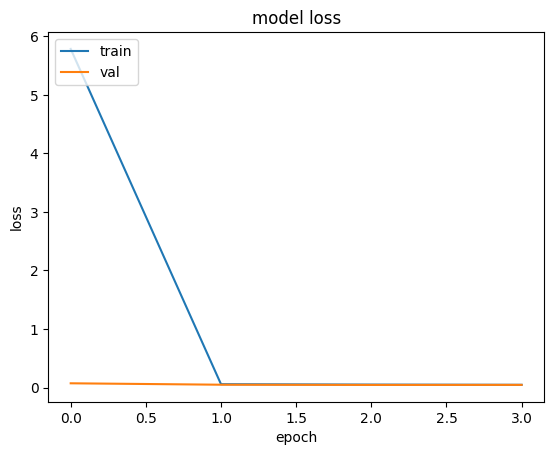

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
predicted_y = model_conv_keras.predict(x_test)
predicted_y = scaler.inverse_transform(predicted_y)
model_conv_keras.evaluate(x_test, y_test)
y_test = scaler.inverse_transform(y_test)

25/25 [==============================] - 19s 763ms/step - loss: 0.0486


In [22]:
import numpy as np

def r_squared(y_true, y_pred):

    y_true_mean = np.mean(y_true)

    rss = np.sum(np.square(y_true - y_pred))

    tss = np.sum(np.square(y_true - y_true_mean))

    r_squared = 1 - (rss / tss)

    return r_squared

r_squared_value = r_squared(y_test, predicted_y)
print("R-squared value:", r_squared_value)


R-squared value: 0.913410918298894


Best Predictions:


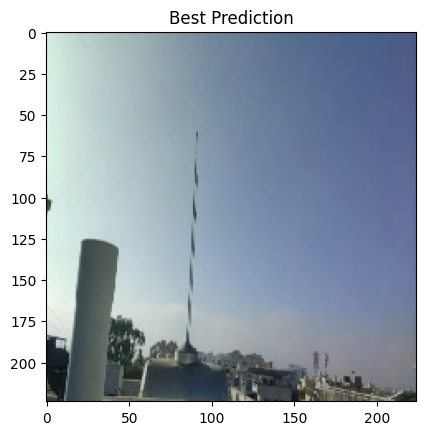

Predicted Values: [ 69.671715   31.555061   64.80633    28.127213  229.54591     7.0981965
  18.211248 ]
Actual Values: [ 68.  32.  61.  26. 228.   5.  21.]




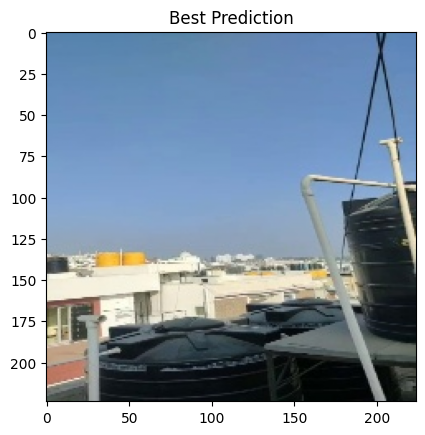

Predicted Values: [ 68.26932    36.92513    63.511036   27.108704  243.1304      6.5045056
  18.173056 ]
Actual Values: [ 70.  35.  61.  22. 244.   4.  16.]




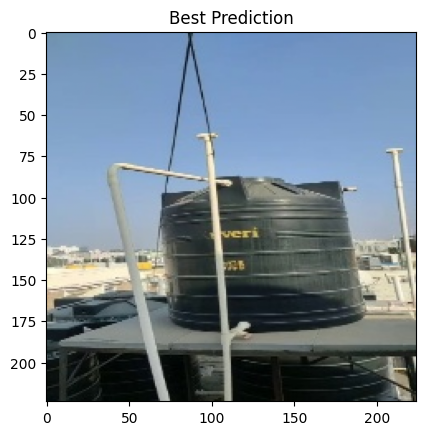

Predicted Values: [ 72.049065   35.31965    65.53649    27.8843    246.023       6.9852624
  18.341656 ]
Actual Values: [ 70.  35.  61.  22. 244.   4.  16.]


Worst Predictions:


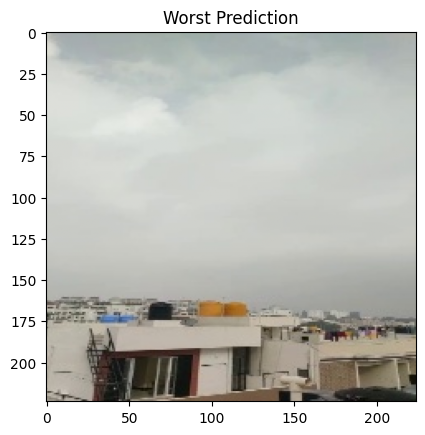

Predicted Values: [ 76.30204   32.364086  68.88879   30.056452 249.69203    8.532024
  20.060295]
Actual Values: [ 15.   4.   7.  37. 288.  10.  10.]




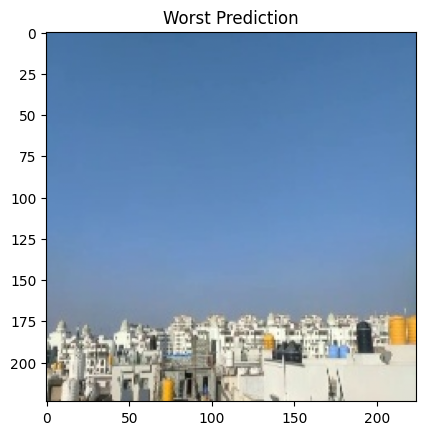

Predicted Values: [ 80.62416    37.36235    79.324875   32.53748   235.32417     6.7629147
  19.93714  ]
Actual Values: [ 41.  20.  36.   9. 165.   3.   8.]




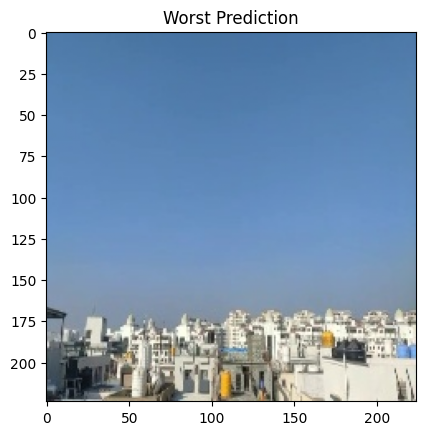

Predicted Values: [ 80.91577   38.762417  80.70787   32.532722 238.97713    6.605393
  20.273388]
Actual Values: [ 41.  20.  36.   9. 165.   3.   8.]




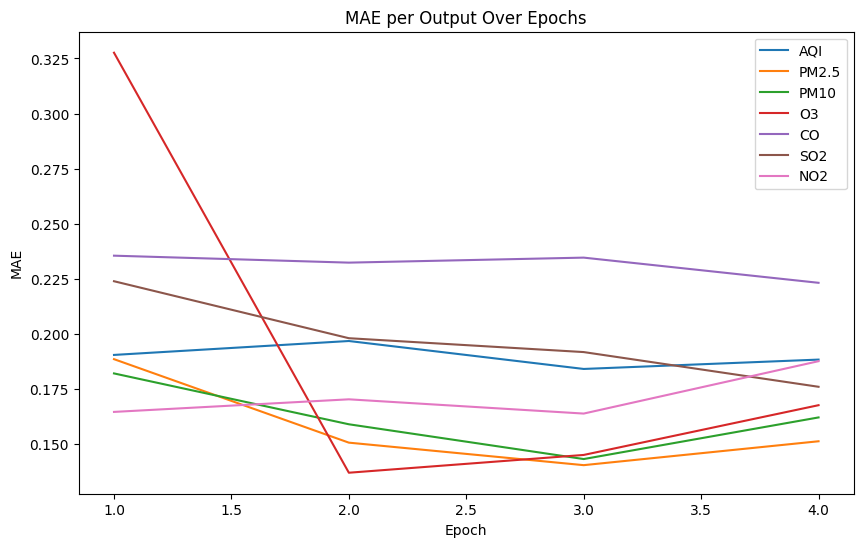

In [25]:
absolute_errors = np.abs(y_test - predicted_y)
mae_per_example = np.mean(absolute_errors, axis=1)

best_indices = np.argsort(mae_per_example)[:3]
worst_indices = np.argsort(mae_per_example)[-3:]

print("Best Predictions:")
for idx in best_indices:
    # Assuming X_test contains the images
    img = x_test[idx]
    plt.imshow(img)
    plt.title("Best Prediction")
    plt.show()
    print("Predicted Values:", predicted_y[idx])
    print("Actual Values:", y_test[idx])
    print("\n")

print("Worst Predictions:")
for idx in worst_indices:
    # Assuming X_test contains the images
    img = x_test[idx]
    plt.imshow(img)
    plt.title("Worst Prediction")
    plt.show()

    print("Predicted Values:", predicted_y[idx])
    print("Actual Values:", y_test[idx])
    print("\n")
    mae_per_output = np.array(mae_callback.mae_per_output)

plt.figure(figsize=(10, 6))
for i in range(mae_per_output.shape[1]):
    label = output_labels.get(i, f'MAE Output {i + 1}')
    plt.plot(range(1, len(mae_per_output) + 1), mae_per_output[:, i], label=label)

plt.title('MAE per Output Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()